# Import Modules

In [1]:
%tensorflow_version 2.x
%matplotlib inline

import numpy as np                     # array goodnes
from tensorflow.keras.utils import get_file    # handy function to download data
from pandas import DataFrame, read_csv # excel for python
from matplotlib import pyplot as plt   # plotting library
import seaborn as sns                  # more plotting goodness

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

TensorFlow 2.x selected.


# Load & Inspect Data-Set

The csv data-set is derived from the Automated Cardiac Diagnosis challenge (ACDC). The data-set provides the following classes:

  1. normal case (NOR, n=20)
  2. heart failure with infarction (MINF, n=20)
  3. dilated cardiomyopathy (DCM, n=20)
  4. hypertrophic cardiomyopathy (HCM, n=20)
  5. abnormal right ventricle (RV, n=20)

The csv is calculated by a [conversion script] implemented in Python by analyzing the ground truth segmentation. The ground truth segmentation denotes the left ventricular endo- and epicard as well as the right ventricular endocard.

![acdc logo]

## Imaging Technique
> The acquisitions were obtained over a 6 year period using two MRI scanners of different magnetic strengths (1.5 T (Siemens Area, Siemens Medical Solutions, Germany) and 3.0 T (Siemens Trio Tim, Siemens Medical Solutions, Germany)). Cine MR images were acquired in breath hold with a retrospective or prospective gating and with a SSFP sequence in short axis orientation. Particularly, a series of short axis slices cover the LV from the base to the apex, with a thickness of 5 mm (or sometimes 8 mm) and sometimes an interslice gap of 5 mm (then one image every 5 or 10 mm, according to the examination). The spatial resolution goes from 1.37 to 1.68 mm2/pixel and 28 to 40 images cover completely or partially the cardiac cycle (in the second case, with prospective gating, only 5 to 10 % of the end of the cardiac cycle was omitted), all depending on the patient.  
([source][data set information])

[conversion script]: https://github.com/liob/ai-winter-school/blob/master/data/automated_cardiac_diagnosis_challenge_conversion_script.py
[acdc logo]: https://acdc.creatis.insa-lyon.fr/description/files/illustrationChallengeACDC.png
[data set information]: https://acdc.creatis.insa-lyon.fr/description/databases.html

In [2]:
fn_acdc = get_file('acdc.csv', 'https://raw.githubusercontent.com/liob/ai-winther-school/master/data/automated_cardiac_diagnosis_challenge.csv')

df_acdc = read_csv(fn_acdc)
X_acdc = df_acdc.drop(['group'], axis=1)
Y_acdc = df_acdc['group']

df_acdc.head()

,group,height,id,lv_edv,lv_ef,lv_esv,lv_sv,lv_vm,rv_edv,rv_ef,rv_esv,rv_sv,weight
0,DCM,184.0,1,295.5,23.7,225.6,69.9,204.8,139.7,57.4,59.5,80.2,95.0
1,DCM,160.0,2,265.7,29.1,188.3,77.4,202.2,94.4,69.5,28.8,65.6,70.0
2,DCM,165.0,3,276.7,12.9,241.1,35.6,211.1,192.3,9.2,174.6,17.7,77.0
3,DCM,159.0,4,260.8,13.2,226.5,34.4,183.7,106.3,20.4,84.5,21.7,46.0
4,DCM,165.0,5,290.8,22.9,224.1,66.7,243.9,170.5,56.3,74.6,95.9,77.0


In [3]:
df_acdc.describe()

,height,id,lv_edv,lv_ef,lv_esv,lv_sv,lv_vm,rv_edv,rv_ef,rv_esv,rv_sv,weight
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,170.840000,50.500000,164.613000,46.392000,99.057000,65.557000,147.393000,152.991000,46.730000,85.884000,67.09800,74.960000
std,9.710683,29.011492,74.269176,19.916369,78.757498,24.557273,56.755754,55.152087,17.892821,52.467575,28.76558,16.632037
min,140.000000,1.000000,49.300000,10.500000,19.400000,21.800000,38.800000,47.400000,1.900000,10.300000,3.20000,35.000000
25%,165.000000,25.750000,118.075000,28.025000,41.800000,46.200000,104.300000,111.800000,38.175000,51.625000,50.72500,62.750000
50%,171.500000,50.500000,149.050000,53.650000,64.100000,67.000000,143.150000,152.000000,48.400000,70.100000,66.05000,75.000000
75%,178.000000,75.250000,199.825000,62.250000,132.600000,83.100000,175.300000,181.700000,60.025000,108.175000,81.72500,85.000000
max,192.000000,100.000000,374.400000,81.900000,334.500000,128.600000,313.200000,295.100000,85.900000,262.800000,153.20000,123.000000


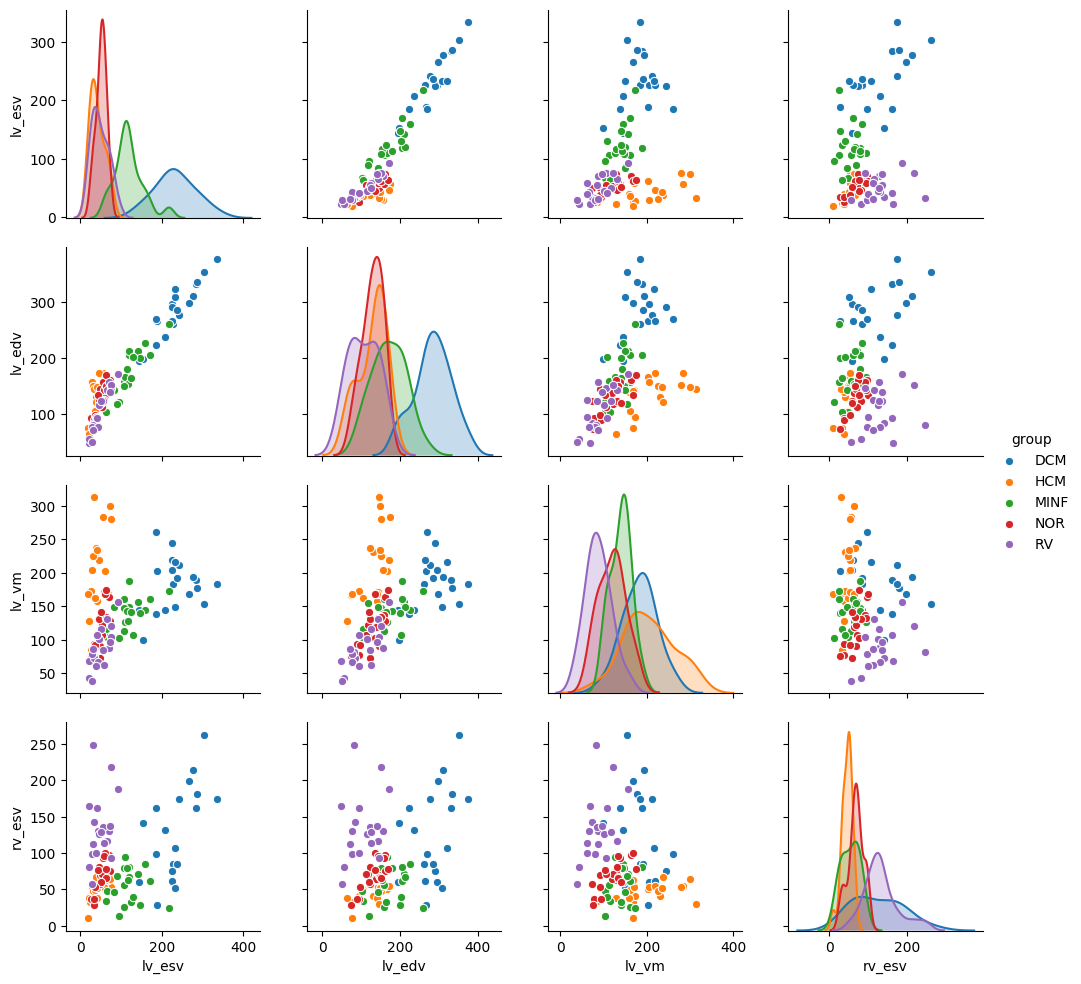

In [4]:
vars = ['lv_esv', 'lv_edv', 'lv_vm', 'rv_esv']
sns.pairplot(vars=vars, hue='group', data=df_acdc)

# Training a Decision Tree

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X_acdc, Y_acdc, 
                                                    test_size=0.33, 
                                                    random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

# see https://scikit-learn.org/stable/modules/model_evaluation.html
clf.score(X_test, Y_test)

0.9696969696969697

# Plot Feature Importance

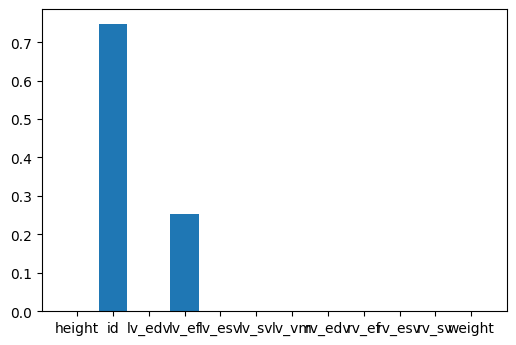

In [6]:
def plot_importance(clf, df):
    plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
    plt.xticks(range(len(clf.feature_importances_)), df.columns)
    
plot_importance(clf, X_train)

# Confusion Matrix

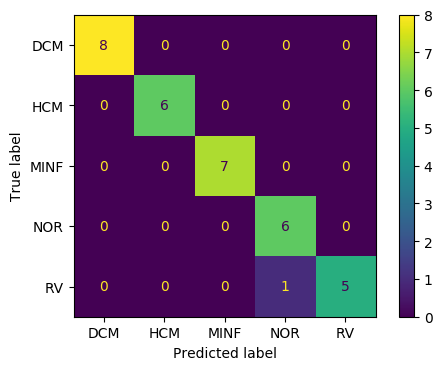

In [7]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix(clf.predict(X_test), Y_test)
plot_confusion_matrix(clf, X_test, Y_test)

# HANDS ON: Training a Random Forest Classifier
![Bundestag](https://www.bundestag.de/image/462008/16x9/598/336/e4f4245308d9f907d264e173cc388a9/uW/plenum_teaser_sitzungsverlauf_bild.jpg)

## First
Train and evaluate a random forest model to predict if the patient has a heart condition.

## Second
Add additional cardiovascular parameters based on the existing values. Wikipedia has a nice [cardiovascular worksheet]. How does the additional information impact the prediction quality?

## Third
Use different hyper parameters for the random forest classifier. You will find a documenation of viable hyperparameters here:  [Random Forest]

Also try [different types of ensemble classifiers][sklearn classifiers], such as the ExtraTreesClassifier model.


[cardiovascular worksheet]: https://en.wikipedia.org/wiki/Template:Cardiovascular_worksheet
[Random Forest]: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
[sklearn classifiers]: http://scikit-learn.org/stable/modules/ensemble.html

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

###################
#                 #
# YOUR CODE HERE! #
#                 #
###################


